# Contexto de la Base de Datos

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Esta Base de datos trata sobre una aerolínea en donde los pasajeros no están muy contentos con el servicio otorgado, ya que algunos aspectos de los servicios obtenidos pueden ser catalogados como mediocres

In [43]:
!pip install ydata_profiling

In [44]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
import ydata_profiling
#Se agregarán más en cuanto avance el temario de clase

In [45]:
Aerolinea = pd.read_csv('/content/drive/MyDrive/EstadisticaProyecto/Aerolinea/train.csv') #Asi el python puede leer la BD que es un CSV (COMA SEPARATED VALUES)
Aerolinea = Aerolinea.drop('Unnamed: 0', axis=1)
Aerolinea.head(5)

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [46]:
Aerolinea['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [47]:
#limites del dataset son [0,25975]
#El tamaño total del dataset es de 25976 registros.

tam_muestra = 9091
viajes = Aerolinea.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 9091 registros

In [48]:
viajes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 80638 to 89551
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 9091 non-null   int64  
 1   Gender                             9091 non-null   object 
 2   Customer Type                      9091 non-null   object 
 3   Age                                9091 non-null   int64  
 4   Type of Travel                     9091 non-null   object 
 5   Class                              9091 non-null   object 
 6   Flight Distance                    9091 non-null   int64  
 7   Inflight wifi service              9091 non-null   int64  
 8   Departure/Arrival time convenient  9091 non-null   int64  
 9   Ease of Online booking             9091 non-null   int64  
 10  Gate location                      9091 non-null   int64  
 11  Food and drink                     9091 non-null   

In [49]:
viajes.nunique()

id                                   9091
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      2292
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        6
Cleanliness                             5
Departure Delay in Minutes            246
Arrival Delay in Minutes              242
satisfaction                      

In [50]:
factor = list(viajes.loc[:,viajes.nunique() < 10]);
viajes[factor] = viajes[factor].astype('category')
viajes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 80638 to 89551
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 9091 non-null   int64   
 1   Gender                             9091 non-null   category
 2   Customer Type                      9091 non-null   category
 3   Age                                9091 non-null   int64   
 4   Type of Travel                     9091 non-null   category
 5   Class                              9091 non-null   category
 6   Flight Distance                    9091 non-null   int64   
 7   Inflight wifi service              9091 non-null   category
 8   Departure/Arrival time convenient  9091 non-null   category
 9   Ease of Online booking             9091 non-null   category
 10  Gate location                      9091 non-null   category
 11  Food and drink                     909

# Objetivo del Analisis Estadístico

Con este estudio se busca entender porque la gran mayoría de clientes de esta aerolínea no están contentos con el
servicio. El objetivo es definir un plan de mejora que contenga las accionies que deben realizarse en orden de relevancia con el fin de mejorar la experiencia de los usuarios.

In [51]:
viajes.describe()

id          Age  Flight Distance  \
count    9091.000000  9091.000000      9091.000000   
mean    64096.737213    39.560114      1196.406446   
std     37450.718689    14.995085       999.393573   
min         9.000000     7.000000        56.000000   
25%     31943.500000    27.000000       416.000000   
50%     63501.000000    40.000000       859.000000   
75%     96596.000000    51.000000      1738.000000   
max    129848.000000    85.000000      4963.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                 9091.000000               9067.000000  
mean                    14.680783                 15.011691  
std                     36.565813                 37.070917  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                    610.000000                593.000000

In [52]:
viajes.describe(exclude=np.number)

Gender   Customer Type   Type of Travel     Class  \
count     9091            9091             9091      9091   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq      4593            7471             6321      4432   

        Inflight wifi service  Departure/Arrival time convenient  \
count                    9091                               9091   
unique                      6                                  6   
top                         3                                  4   
freq                     2262                               2220   

        Ease of Online booking  Gate location  Food and drink  \
count                     9091           9091            9091   
unique                       6              5               6   
top                          3              3               4   
freq                      2107           2438            2137   

        Online boarding  Seat comfort  Inflight entertainment  \
count              9091          9091                    9091   
unique                6             5                       6   
top                   4             4                       4   
freq               2735          2834                    2584   

        On-board service  Leg room service  Baggage handling  Checkin service  \
count               9091              9091              9091             9091   
unique                 6                 6                 5                5   
top                    4                 4                 4                4   
freq                2670              2529              3183             2545   

        Inflight service  Cleanliness             satisfaction  
count               9091         9091                     9091  
unique                 6            5                        2  
top                    4            4  neutral or dissatisfied  
freq                3318         2414                     5106

In [53]:
viajes['Flight Distance'].head()

80638     861
43398     393
32751     196
33571    1020
71287    1117
Name: Flight Distance, dtype: int64

# Ranking de variables  con respecto a la variable objetivo (Satisfaction) por medio de VCramer

In [54]:
# Eliminar variable objetivo continua
varObjBin = viajes.satisfaction
imputViajes = viajes.drop(['satisfaction'],axis=1)
#funcion de Cramer
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(imputViajes.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])
cramertop7 = tablaCramer.VCramer.sort_values(ascending=False)[:7]
cramertop7 = pd.DataFrame(cramertop7,columns=['VCramer'])
px.bar(cramertop7,x=cramertop7.VCramer,title='Relaciones frente a Satisfacción').update_yaxes(categoryorder="total ascending").show()
#Este gráfico nos dice que variables tienen más importancia y más relevancia frente a la variable objetivo,
#esto quiere decir que entre mayor puntuacion se tenga en estas variables,
#mayor probabilidad de que el cliente haya dicho que esta satisfecho y lo mismo en caso contrario.

In [83]:
viajes.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [84]:
viajes['Inflight wifi service'].describe()

count     9091
unique       6
top          3
freq      2262
Name: Inflight wifi service, dtype: int64

In [55]:
ydata_profiling.ProfileReport(viajes)

Output hidden; open in https://colab.research.google.com to view.

# Variable Objetivo -> Satisfacción

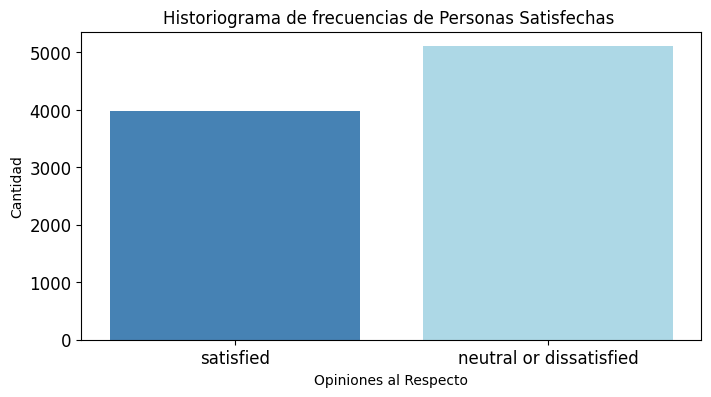

In [56]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias de Personas Satisfechas ')

satisfechos = viajes.loc[viajes['satisfaction'] == 'satisfied']
Nosatisfechos = viajes.loc[viajes['satisfaction'] == 'neutral or dissatisfied']

# Obtener las frecuencias de las categorías
satisfechos_freq = len(satisfechos)
Nosatisfechos_freq = len(Nosatisfechos)

# Crear el gráfico de barras con las alturas correctas
plt.bar(['satisfied', 'neutral or dissatisfied'], [satisfechos_freq, Nosatisfechos_freq], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Opiniones al Respecto')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



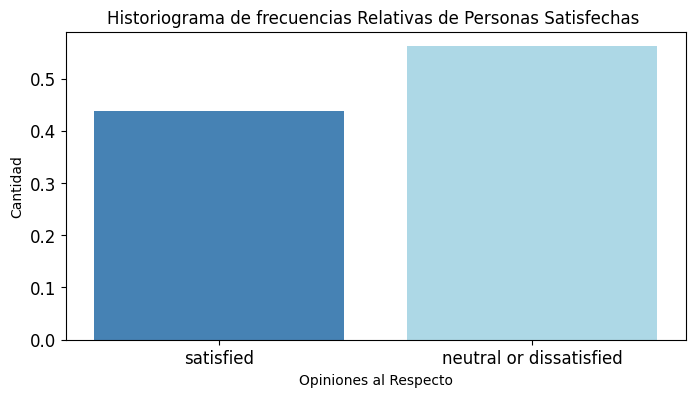

In [57]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias Relativas de Personas Satisfechas ')
satisfechos = viajes.loc[viajes['satisfaction'] == 'satisfied']
Nosatisfechos = viajes.loc[viajes['satisfaction'] == 'neutral or dissatisfied']

# Obtener las frecuencias de las categorías
satisfechos_freq = len(satisfechos)
Nosatisfechos_freq = len(Nosatisfechos)
total = satisfechos_freq + Nosatisfechos_freq

satisfechos_rel = satisfechos_freq/total
Nosatisfechos_rel = Nosatisfechos_freq/total

# Crear el gráfico de barras con las alturas correctas
plt.bar(['satisfied', 'neutral or dissatisfied'], [satisfechos_rel, Nosatisfechos_rel], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Opiniones al Respecto')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

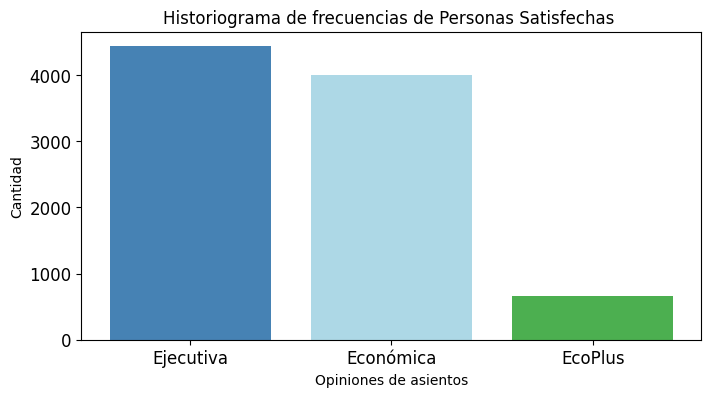

In [58]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias de Personas Satisfechas ')

Ejecutiva = viajes.loc[(viajes.Class == 'Business')]
Economica = viajes.loc[(viajes.Class == 'Eco')]
EcoPlus = viajes.loc[(viajes.Class == 'Eco Plus')]

# Obtener las frecuencias de las categorías
Ejecutiva_freq = len(Ejecutiva)
Economica_freq = len(Economica)
EcoPlus_freq = len(EcoPlus)



# Crear el gráfico de barras con las alturas correctas
plt.bar(['Ejecutiva', 'Económica' , 'EcoPlus'], [Ejecutiva_freq, Economica_freq, EcoPlus_freq], color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Opiniones de asientos')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



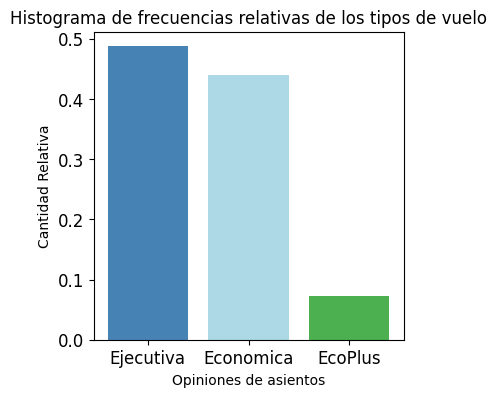

In [59]:
plt.figure(figsize=(4, 4))
plt.title('Histograma de frecuencias relativas de los tipos de vuelo')
Ejecutiva = viajes.loc[viajes['Class'] == 'Business'].shape[0]
Economica = viajes.loc[viajes['Class'] == 'Eco'].shape[0]
EcoPlus = viajes.loc[viajes['Class'] == 'Eco Plus'].shape[0]
total = Ejecutiva + Economica + EcoPlus

# Obtener las frecuencias de las categorías
Ejecutiva_rel = Ejecutiva / total
Economica_rel = Economica / total
EcoPlus_rel = EcoPlus / total

# Crear el gráfico de barras con las alturas correctas
plt.bar(['Ejecutiva', 'Economica', 'EcoPlus'], [Ejecutiva_rel, Economica_rel, EcoPlus_rel], color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Opiniones de asientos')
plt.ylabel('Cantidad Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



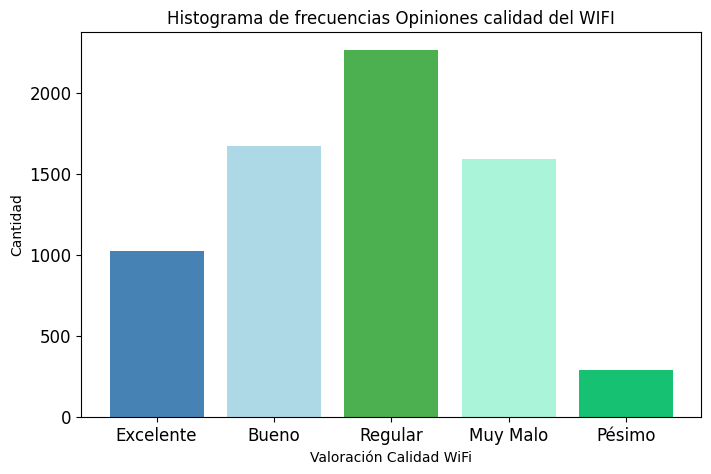

In [60]:
plt.figure(figsize=(8, 5))
plt.title('Histograma de frecuencias Opiniones calidad del WIFI')
PesimoWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 0)])
MuyMalWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 1)])
MalWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 2)])
RegularWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 3)])
BuenWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 4)])
ExcelenteWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 5)])


P_freq = PesimoWifi
MM_freq = MuyMalWifi
M_freq = MalWifi
R_freq = RegularWifi
B_freq = BuenWifi
E_freq = ExcelenteWifi




plt.bar(['Excelente', 'Bueno' , 'Regular', 'Muy Malo','Pésimo'], [E_freq, B_freq, R_freq, MM_freq, P_freq],
        color=['#4682B4', '#ADD8E6', '#4CAF50' , '#AAF4D9', '#16C172'])

plt.xlabel('Valoración Calidad WiFi')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


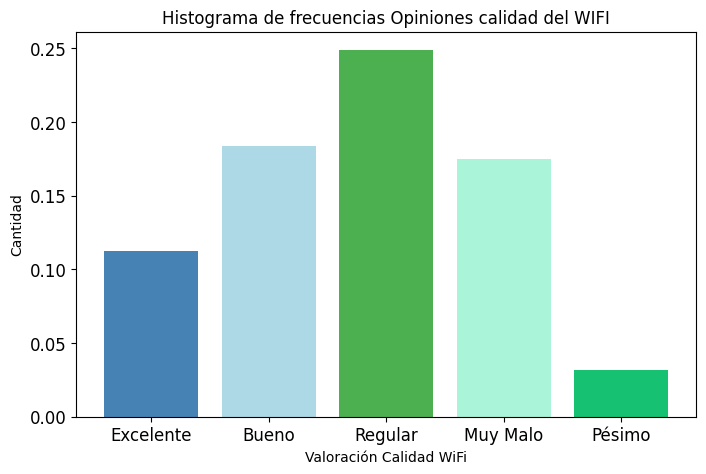

In [61]:
plt.figure(figsize=(8, 5))
plt.title('Histograma de frecuencias Opiniones calidad del WIFI')
PesimoWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 0)])
MuyMalWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 1)])
MalWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 2)])
RegularWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 3)])
BuenWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 4)])
ExcelenteWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 5)])
total = PesimoWifi + MuyMalWifi + MalWifi + RegularWifi + BuenWifi + ExcelenteWifi

P_freq = PesimoWifi/total
MM_freq = MuyMalWifi/total
M_freq = MalWifi/total
R_freq = RegularWifi/total
B_freq = BuenWifi/total
E_freq = ExcelenteWifi/total




plt.bar(['Excelente', 'Bueno' , 'Regular', 'Muy Malo','Pésimo'], [E_freq, B_freq, R_freq, MM_freq, P_freq],
        color=['#4682B4', '#ADD8E6', '#4CAF50' , '#AAF4D9', '#16C172'])

plt.xlabel('Valoración Calidad WiFi')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


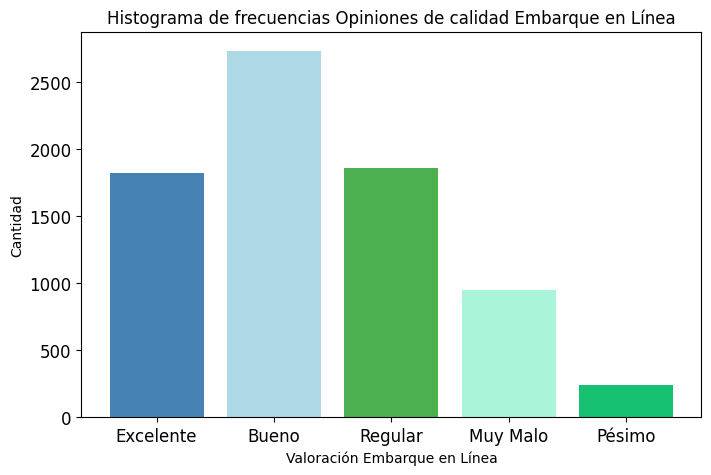

In [62]:

plt.figure(figsize=(8, 5))
plt.title('Histograma de frecuencias Opiniones de calidad Embarque en Línea')
PesimoServ = len(viajes.loc[(viajes['Online boarding'] == 0)])
MuyMalServ = len(viajes.loc[(viajes['Online boarding'] == 1)])
MalServ = len(viajes.loc[(viajes['Online boarding'] == 2)])
RegularServ = len(viajes.loc[(viajes['Online boarding'] == 3)])
BuenServ = len(viajes.loc[(viajes['Online boarding'] == 4)])
ExcelenteServ = len(viajes.loc[(viajes['Online boarding'] == 5)])


P_freq = PesimoServ
MM_freq = MuyMalServ
M_freq = MalServ
R_freq = RegularServ
B_freq = BuenServ
E_freq = ExcelenteServ




plt.bar(['Excelente', 'Bueno' , 'Regular', 'Muy Malo','Pésimo'], [E_freq, B_freq, R_freq, MM_freq, P_freq],
        color=['#4682B4', '#ADD8E6', '#4CAF50' , '#AAF4D9', '#16C172'])

plt.xlabel('Valoración Embarque en Línea')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


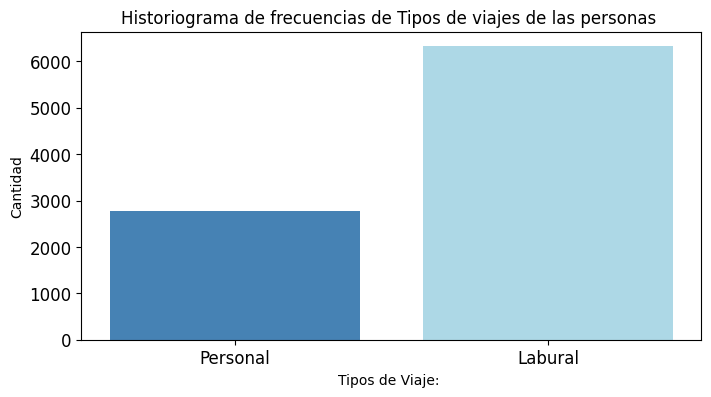

In [63]:
#print(viajes['Type of Travel'].head())
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias de Tipos de viajes de las personas ')
Personal = len(viajes.loc[(viajes['Type of Travel'] == 'Personal Travel')])
Trabajo = len(viajes.loc[(viajes['Type of Travel'] == 'Business travel')])

# Obtener las frecuencias de las categorías
Personal_freq = Personal
Trabajo_freq = Trabajo




# Crear el gráfico de barras con las alturas correctas
plt.bar(['Personal', 'Labural'], [Personal_freq, Trabajo_freq], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Tipos de Viaje: ')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

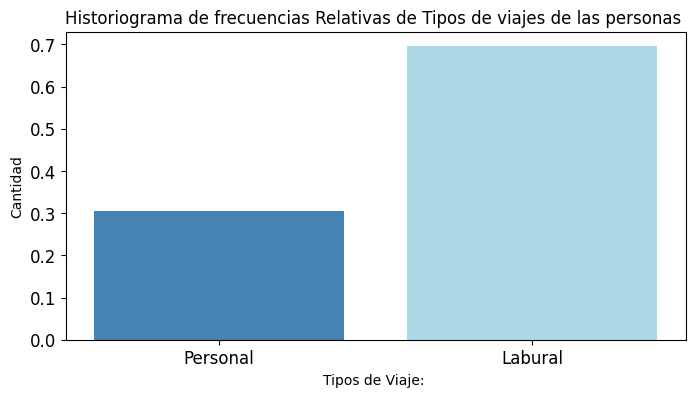

In [64]:
#print(viajes['Type of Travel'].head())
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias Relativas de Tipos de viajes de las personas ')
Personal = len(viajes.loc[(viajes['Type of Travel'] == 'Personal Travel')])
Trabajo = len(viajes.loc[(viajes['Type of Travel'] == 'Business travel')])
total = Personal + Trabajo
# Obtener las frecuencias de las categorías
Personal_freq = Personal/total
Trabajo_freq = Trabajo/total

# Crear el gráfico de barras con las alturas correctas
plt.bar(['Personal', 'Labural'], [Personal_freq, Trabajo_freq], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Tipos de Viaje: ')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [65]:
def grafico_frecuencias(variable):
    frecuencias = variable.value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(frecuencias.index, frecuencias.values)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.title('Gráfico de frecuencias')
    plt.show()


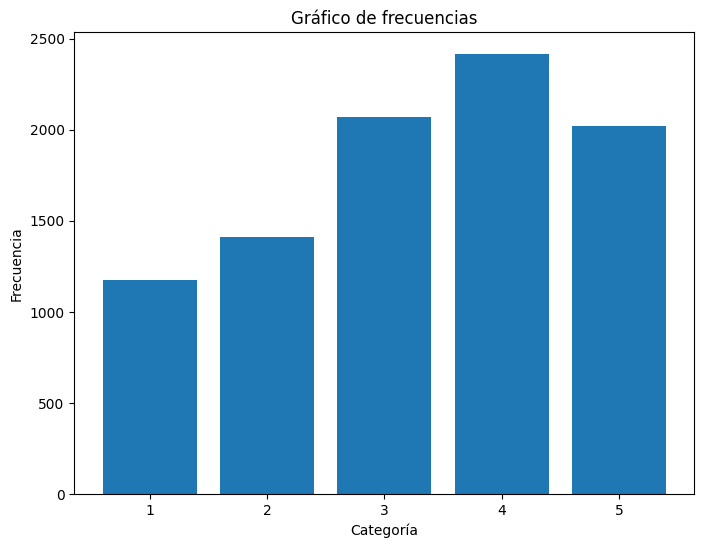

In [66]:
grafico_frecuencias(viajes['Cleanliness'])

In [67]:
def grafico_frecuencias_relativas(variable):
    frecuencias_relativas = variable.value_counts(normalize=True)
    plt.figure(figsize=(8, 6))
    plt.bar(frecuencias_relativas.index, frecuencias_relativas.values)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia Relativa')
    plt.title('Gráfico de Frecuencias Relativas')
    plt.show()

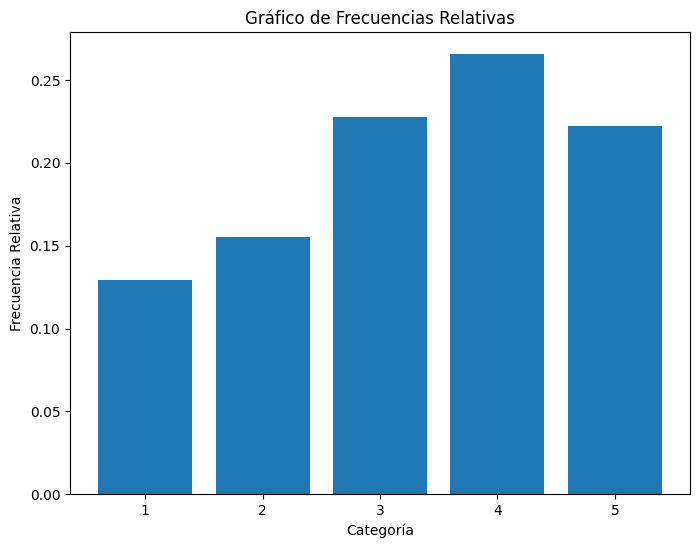

In [68]:
grafico_frecuencias_relativas(viajes['Cleanliness'])

# Historiogramas Variable vs variable Objetivo

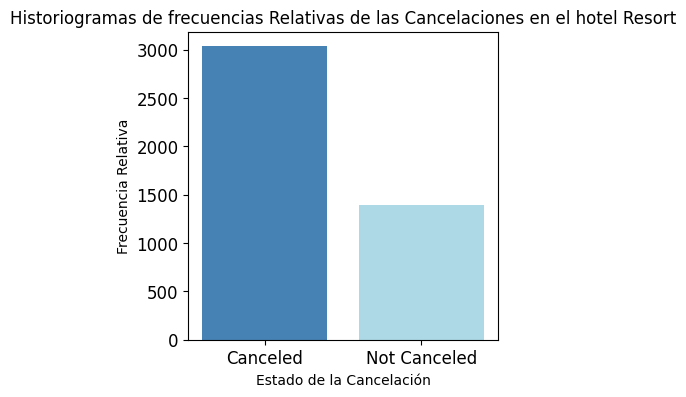

In [69]:
# Historiograma de frecuencia Relativa
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de las Cancelaciones en el hotel Resort')

satisfechos = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes.Class == 'Business')])
nosatisfechos = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes.Class == 'Business')])


plt.bar(['Canceled', 'Not Canceled'], [satisfechos, nosatisfechos], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de la Cancelación')
plt.ylabel('Frecuencia Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Historiogramas de satisfaccion con respecto a su tipo de asiento

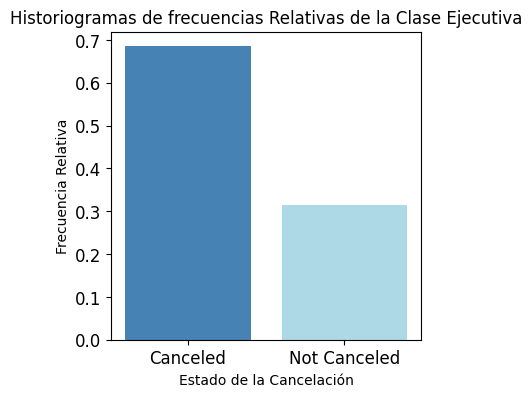

In [70]:
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de la Clase Ejecutiva')

satisfechos = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes.Class == 'Business')])
nosatisfechos = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes.Class == 'Business')])
total = satisfechos + nosatisfechos

satisfechos_rel = satisfechos / total
no_satisfechos_rel = nosatisfechos / total

plt.bar(['Canceled', 'Not Canceled'], [satisfechos_rel, no_satisfechos_rel], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de la Cancelación')
plt.ylabel('Frecuencia Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Casi un 31% no está satisfecho en la clase ejecutiva, redondeando, esto que de 3 personas que van en clase ejecutiva 1 no queda satisfecha. Si se obtuvo este ratio en la clase más prestigiosa me imagino que será incluso peor en las demás clases ofrecidas por la aerolinea.

Text(0, 0.5, 'Frecuencia Relativa')

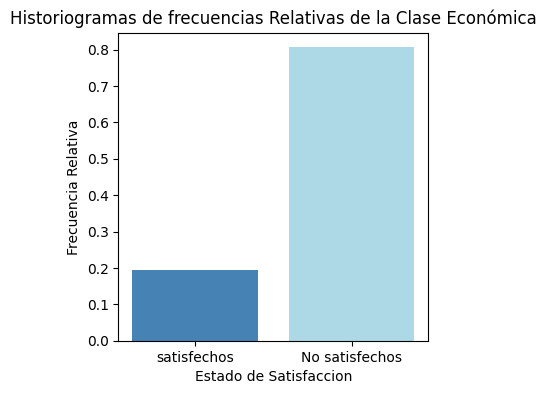

In [71]:
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de la Clase Económica')

satisfechos = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes.Class == 'Eco')])
nosatisfechos = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes.Class == 'Eco')])
total = satisfechos + nosatisfechos

satisfechos_rel = satisfechos / total
no_satisfechos_rel = nosatisfechos / total

plt.bar(['satisfechos', 'No satisfechos'], [satisfechos_rel, no_satisfechos_rel], color=['#4682B4', '#ADD8E6'])
plt.xlabel('Estado de Satisfaccion')
plt.ylabel('Frecuencia Relativa')


<BarContainer object of 2 artists>

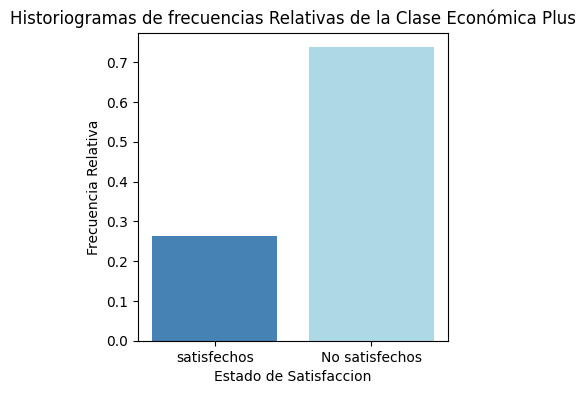

In [72]:
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de la Clase Económica Plus')

satisfechos = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes.Class == 'Eco Plus')])
nosatisfechos = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes.Class == 'Eco Plus')])
total = satisfechos + nosatisfechos

satisfechos_rel = satisfechos / total
no_satisfechos_rel = nosatisfechos / total
plt.xlabel('Estado de Satisfaccion')
plt.ylabel('Frecuencia Relativa')

plt.bar(['satisfechos', 'No satisfechos'], [satisfechos_rel, no_satisfechos_rel], color=['#4682B4', '#ADD8E6'])


# Historiogramas de calidad de WIFI vs variable objetivo




Son 5 categorías, para las cuales se quiere estudiar si esta satisfecho con respecto al viaje dependiendo al wifi, por lo cual agruparé las 5 categorías en 3 las cuales serán: {Mal Wifi: Pesimo-MUY MAL-MAL, Regular: Regular, Bueno: Buen, EXCELENTE}. Se perdera significancia en la data haciendo esto, pero como no se trabajará con Regresiones lineales, la lectura y expresion de los gráficos no se verá muy afectada.


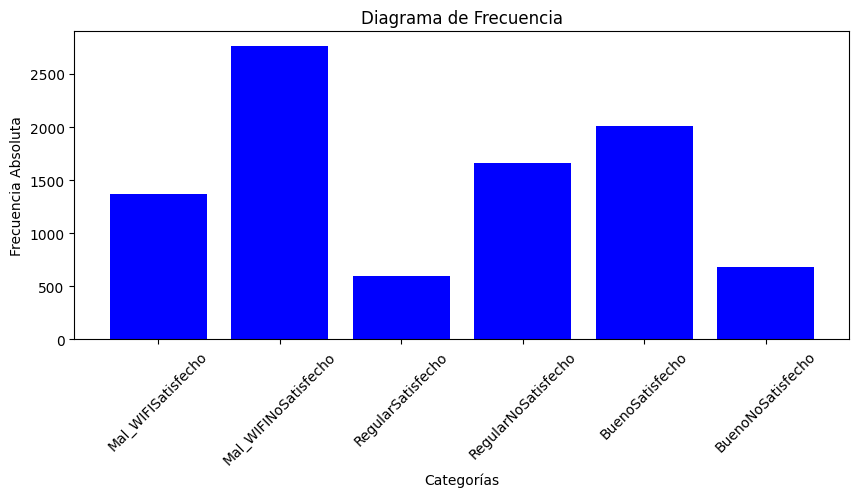

In [73]:

MMM = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 0)])
NMMM = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 0)])
MM = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 1)])
NMM = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 1)])
M = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 2)])
NM = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 2)])

R = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 3)])
NR = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 3)])

B = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 4)])
NB = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 4)])

E = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 5)])
NE = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 5)])




Mal_WifiSatisfechos = {
    'Mal_WIFISatisfecho': MMM + MM + M
}

Mal_WifiNoSatisfecho = {
    'Mal_WIFINoSatisfecho': NMMM + NMM + NM
}

Regular_Satisfecho = {
    'RegularSatisfecho': R
}

Regular_NoSatisfecho = {
    'RegularNoSatisfecho': NR
}

Bueno_Satisfecho = {
    'BuenoSatisfecho': B + E
}

Bueno_NoSatisfecho = {
    'BuenoNoSatisfecho': NB + NE
}

categories = list(Mal_WifiSatisfechos.keys()) + list(Mal_WifiNoSatisfecho.keys()) + list(Regular_Satisfecho.keys()) + list(Regular_NoSatisfecho.keys()) + list(Bueno_Satisfecho.keys()) + list(Bueno_NoSatisfecho.keys())

frequencies = list(Mal_WifiSatisfechos.values()) + list(Mal_WifiNoSatisfecho.values()) + list(Regular_Satisfecho.values()) + list(Regular_NoSatisfecho.values()) + list(Bueno_Satisfecho.values()) + list(Bueno_NoSatisfecho.values())

# Configurar el gráfico
plt.figure(figsize=(10, 4))
plt.bar(categories, frequencies, color='blue')

# Añadir la categoría "Bueno_NoSatisfecho" al gráfico
plt.xticks(rotation=45)
plt.xlabel('Categorías')
plt.ylabel('Frecuencia Absoluta')
plt.title('Diagrama de Frecuencia')

plt.show()














Como se esperaba, mucha gente que tuvo mala experiencia con el wifi puntuo insatisfecho a la hora de viajar.

<Axes: xlabel='Online boarding', ylabel='count'>

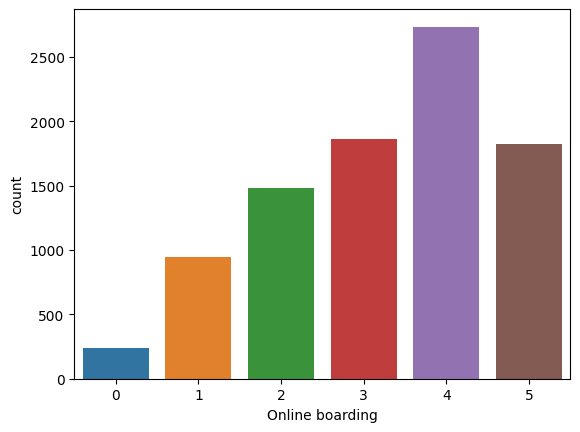

In [74]:
def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        fig = sns.countplot(x=col)
        return(fig)

# Aplicación a una variable en particular
cat_plot(viajes['Online boarding'])

<Axes: xlabel='Online boarding', ylabel='count'>

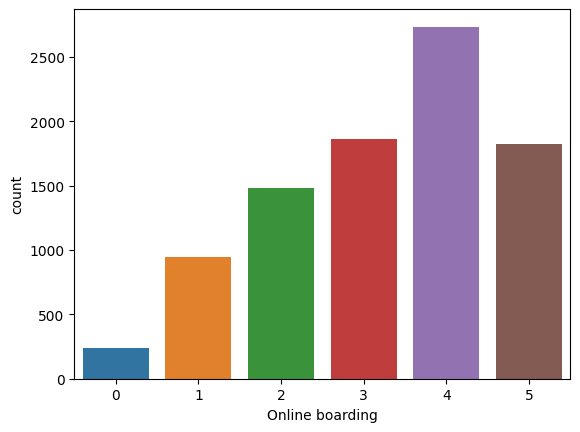

In [75]:
def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        fig = sns.countplot(x=col)
        return(fig)

# Aplicación a una variable en particular
cat_plot(viajes['Online boarding'])


80638    2
43398    3
32751    1
33571    2
71287    2
Name: Inflight wifi service, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

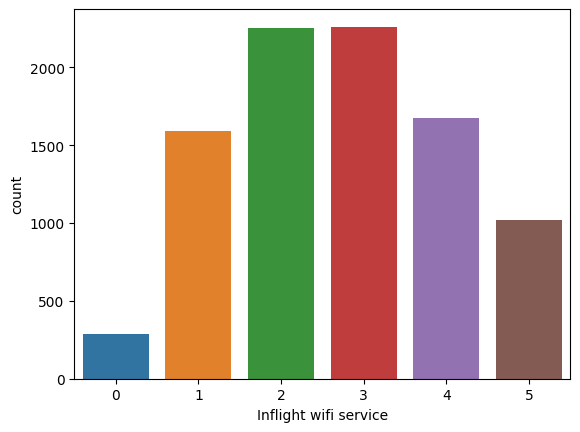

In [76]:
cat_plot(viajes['Inflight wifi service'])
viajes['Inflight wifi service'].head()

<Axes: xlabel='Class', ylabel='count'>

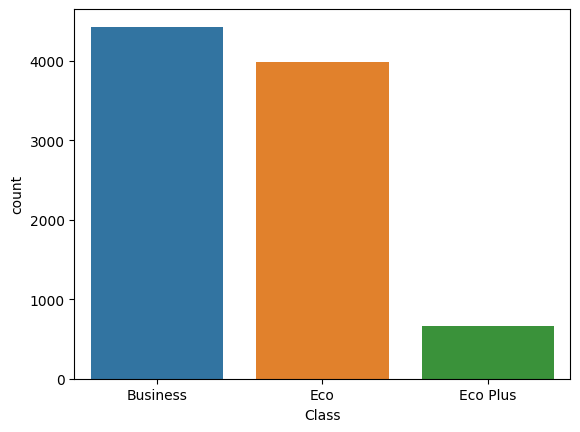

In [77]:
cat_plot(viajes['Class'])

<Axes: xlabel='Type of Travel', ylabel='count'>

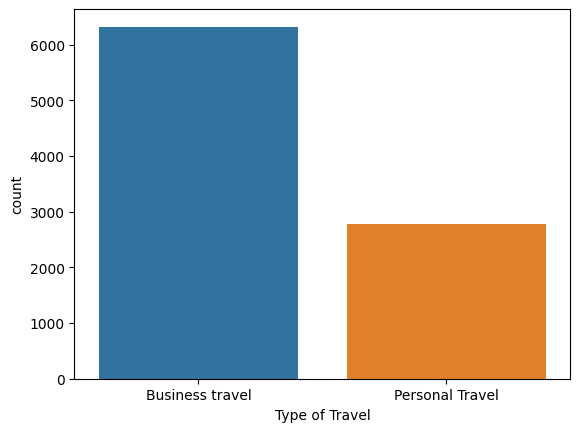

In [78]:
cat_plot(viajes['Type of Travel'])

80638    5
43398    3
32751    4
33571    4
71287    2
Name: Inflight entertainment, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

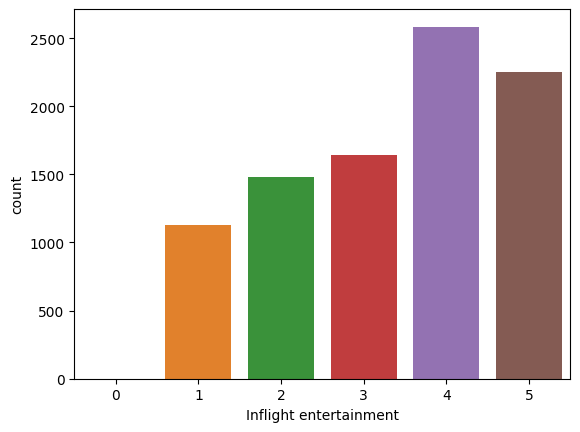

In [79]:
cat_plot(viajes['Inflight entertainment'])
viajes['Inflight entertainment'].head()

80638    5
43398    3
32751    3
33571    4
71287    5
Name: Seat comfort, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

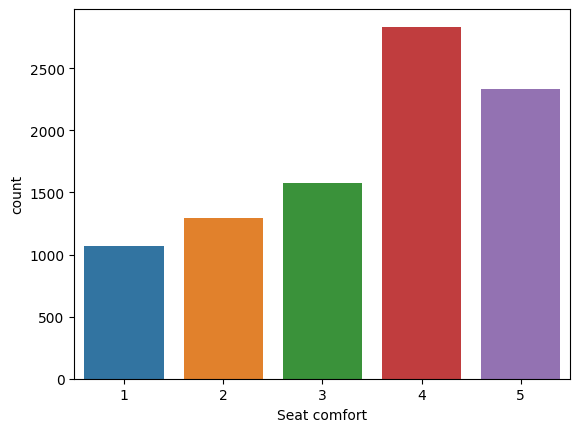

In [80]:
cat_plot(viajes['Seat comfort'])
viajes['Seat comfort'].head()

<Axes: xlabel='Leg room service', ylabel='count'>

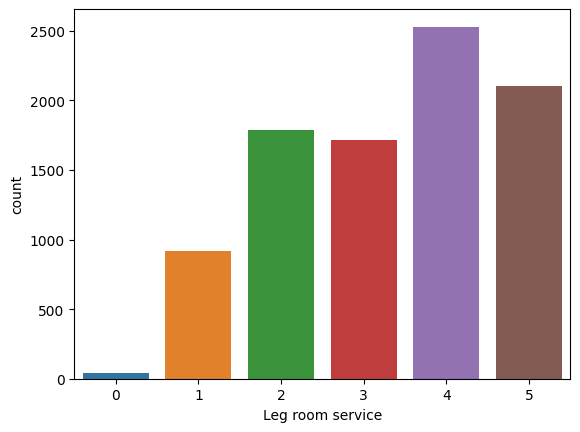

In [81]:
cat_plot(viajes['Leg room service'])

In [82]:
viajes['Leg room service'].head()

80638    4
43398    1
32751    1
33571    2
71287    2
Name: Leg room service, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]